# <font color=darkblue> Machine Learning model deployment with Flask framework on Heroku</font>

## <font color=Blue>Used Cars Price Prediction Application</font>

### Objective:
1. To build a Machine learning regression model to predict the selling price of the used cars based on the different input features like fuel_type, kms_driven, type of transmission etc.
2. Deploy the machine learning model with flask framework on heroku.

### Dataset Information:
#### Dataset Source: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv
This dataset contains information about used cars listed on www.cardekho.com
- **Car_Name**: Name of the car
- **Year**: Year of Purchase
- **Selling Price (target)**: Selling price of the car in lakhs
- **Present Price**: Present price of the car in lakhs
- **Kms_Driven**: kilometers driven
- **Fuel_Type**: Petrol/diesel/CNG
- **Seller_Type**: Dealer or Indiviual
- **Transmission**: Manual or Automatic
- **Owner**: first, second or third owner


### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### 2. Load the dataset

In [2]:
# Read and load the dataset
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 3. Check the shape and basic information of the dataset.

In [3]:
## check the shape 
df.shape

(301, 9)

In [4]:
## check basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### 4. Check for the presence of the duplicate records in the dataset? If present drop them

In [5]:
## Finding the duplicate records
len(df[df.duplicated()])

2

In [6]:
## dropping duplicates
df.drop_duplicates(inplace=True)

In [7]:
## Checking if the duplicate records got removed or not
len(df[df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis.

In [8]:
## dropping redundant columns
df.drop(['Car_Name'],axis=1,inplace=True)

### 6. Extract a new feature called 'age_of_the_car' from the feature 'year' and drop the feature year

In [9]:
df['Age_of_the_car'] = 2022 - df['Year']

In [10]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_the_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [11]:
## dropping Year column
df.drop('Year',axis=1,inplace=True)

In [12]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_the_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


### 7. Encode the categorical columns

In [13]:
## Label Encoding categorical variables "Fuel_Type", "Seller_Type", and "Transmission" using label encoder

## select object datatype variables
object_type_variables = [i for i in df[["Fuel_Type", "Seller_Type", "Transmission"]] if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

In [ ]:
df.head()

### 8. Separate the target and independent features.

In [14]:
## separate target and independent variables
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

### 9. Split the data into train and test.

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(209, 7) (90, 7)
(209,) (90,)


### 10. Build a Random forest Regressor model and check the r2-score for train and test.

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('r2 score: ',metrics.r2_score(y_test, y_pred)*100)
print('mean squared log error: ',metrics.mean_squared_log_error(y_test, y_pred)*100)

r2 score:  89.87796948783587
mean squared log error:  2.2625948314283835


<AxesSubplot:xlabel='Selling_Price'>

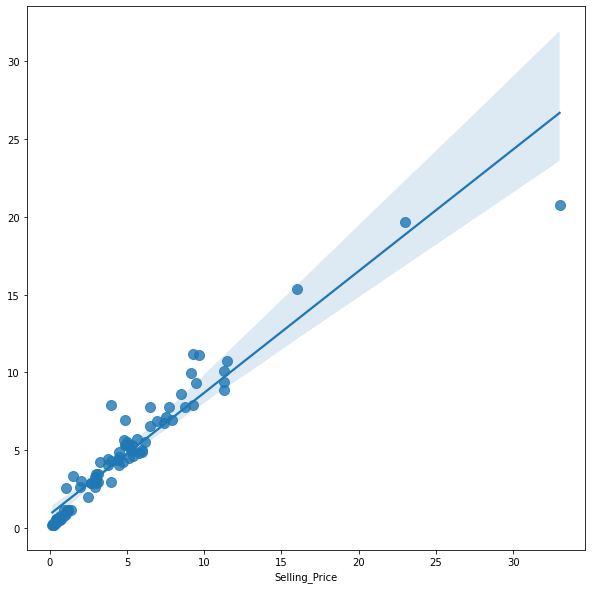

In [19]:
plt.figure(figsize=(10,10))
sns.regplot(y_test, y_pred, fit_reg=True, scatter_kws={"s": 100})

### 11. Create a pickle file with an extension as .pkl

In [20]:
import pickle
# Saving model to disk
pickle.dump(rf, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

### 12. Create new folder/new project in visual studio/pycharm that should contain the "model.pkl" file *make sure you are using a virutal environment and install required packages.*

### a) Create a basic HTML form for the frontend

Create a file **index.html** in the templates folder and copy the following code.

In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>
<script type="text/javascript" src="https://gc.kis.v2.scr.kaspersky-labs.com/FD126C42-EBFA-4E12-B309-BB3FDD723AC1/main.js?attr=TFVsmdRRpuoTQkWBfTaDV8YrrvsHu6XpKXI9azIPNqYPsZayN1bVjW2UxEYwkXPA569oyIP4PFAVF6LPwn_Fs19tzNcyo62EgpBP0cfLEyTQe3vRdy6vV5Clu7iy91uR272EsQwuURp6a7wn3vDzyGo1SBOyeR79ogt3hlOKhJftQW78HMQr0vm49XjquByQ0Yh8KeMWqhTmssAf9Wg8ldezv0D-0AU6452dk2qqM40jqbTsyIcKrlBk5-JcEma69mbPaZGWkslGbQ8Sga5KmwGY5e_4IJQAIQsrJjXrX-8pixX7x2FU97oDBf1RiQfp5-MfxhNqwap6VCCt_tr8qYtyJD8IRkc0NQsMkx0dIxtNmRidDvuSd3SHPi1ar7skIX8C-vw6J07huwjMwsmO8O-F9BZ3ZN6TUf8P-_t_yrm8lsioKqbDYWYeWQLUANRMzyvlNoRquEevi9m3yxEw5LXTL-pfRk449_G89N1fVax3zPWxDJqTplS9nBuNJEg6BCdwtc0xCJNjMqwSC0Gnyu0LeHVmxsoXfX6SfI78CInKw7wvjAaNp9sU0jf1xveRNmJzWyFe7l2hbHqM-NC2pe20QMJiLvaOj1ynlwJFAQqMPXUy-ZcuAZkZAg2zYe8LwyaY_zetS0fYITfwgt2bDQV8ihvcfKSGTcnKXsDFAWCW1KoaAiH3PFmatfKPav3oP6_GTetaelUyhzaeWzh2S_kRT0wHYfyOP5nME_mNKq3XnsBuJelDIjhbOdRuy3ITBgO-xfnWd4G1NtJSxw7YLbSLjkGLMv-QcaPlbh-x6_F1flY654Dd58bHTSaYhrSxpwieFR680VCTluXATnT72h97PI6nsqUPxd0PCiCgk49CzQXsEVdYa9u92183HSSbhB0pfkV2JV7usJIAv95yDSwgz3NWPzed_F7MMytRmxCgtVnOY4GKVMzi9vzJwsQdhezJ9bILheztA3Fzvt8pP0Uz92mwO-3xSs5n2gF0lWdfNdEMHvBC4qKefbBipBkywErYSRGWMFf86Co0YChdVt1xeXqEnEsT-W9wPJMQ7TLT4RBllEQlaz1qPOwu5XLfh-UYrzvMOzKJel1z56AmqAD2oxw9vf-G294BQh8h3locmT85DL4P8r2Z2hWRbktdG3GZRJjVoUnP-J_lBWlKUbMHEtn5lWuWiMDXEPlzsHy1HB8qWYX9ReaEDuVqE6Wnvp9PirICmV9n4weo491J-6CS9LPoOt6yhDS84QwKcdPSNfxbnocasI2yBuOr3k995n7QUfnsKDs4d7SQqmxTUrfacCuaIpytWxAP8azBr2Q" nonce="b460b94c052278d493b9346560829d5d" charset="UTF-8"></script><link rel="stylesheet" crossorigin="anonymous" href="https://gc.kis.v2.scr.kaspersky-labs.com/E3E8934C-235A-4B0E-825A-35A08381A191/abn/main.css?attr=aHR0cHM6Ly9tYWlsLWF0dGFjaG1lbnQuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2F0dGFjaG1lbnQvdS8wLz91aT0yJmlrPTk0MmYzYzAyYzYmYXR0aWQ9MC4xJnBlcm1tc2dpZD1tc2ctZjoxNzQwNTA3NDMwNjMwMzIzNzMzJnRoPTE4Mjc4NjQ5NWJhNWY2MTUmdmlldz1hdHQmZGlzcD1zYWZlJnJlYWxhdHRpZD1mX2w2amMwcmJ1MCZzYWRkYmF0PUFOR2pkSjlsTU8xUGlTRlhXc1lIeEd3UmJtREdHYlRvYXBjSVh2QjF3Y1lVcEdHaVBQS0xoazM4NGhJMnVtczBwTHJCa0xCeW5MZy14RFZYazRIM205TjhRakVxbTRfTmRpUHNCSjF2UGk0dWRna3k5cDk2dUplUXBFd3hSbkl2ZHNPX3RXRFdIRzAtSFhKTTJuQmxkTlg5N0loUnY1cWhMWkZUY2FYR21QYnhlcU1nUU84cXI2WnZsdUZIUDVjeU1iN1BxWmhvUEpCcW9ETjRYWEZtbXZ3THRfaHh0aWFQUzNNalNMOFhMRnJXdkZRNGZ3dkU2QjB0c0ZDWm8yQnB3dlJKRklWbUhfSVp6cTZ2Zkd1bmszeFFRa3VVN0lkRkQyUkp4VUE3dnF2THdYTXlmS3hnYW5UZVRjRTkxNTluQjNrX3doWGtKOW9qWXo3S2ZSZEIxV2FiQzd2NUN1bEdTY20tTDJYeDA4aFc3TW9kSEs2aDRvd3dTQkM0bjNpNS1GQUkwTERaQ3pLdkIwSTVUUkV1VFEtdTBsTGxEamppTU05V0J1VGlUbGtvcFlUbDZLckZPZ3F6YjM3OW1Edms2cktST191MjJMZ1N6LU81M2FteHNmX1FNd1BvcjNyQVp6ZHVyRktLSXhyTjRQSGNrNC1wRnU2YWVHSFZJc005eFFpemZ2RHB6Q3lCVmFVSEFBMEVKU0NWenpTNzJqdTBGZTBuTk1fT2Q4WDd5ekF6ZDRZaW5vTEFIV00wbV9SRFk5OEtadlU4LS1ieFIwZ3pxTTdMUzRpRUJPN1F1Sk8zTDFhcUx0dTFZQXRZZG1VdEJuZ1BubHpYNnA3T1IybU85TmtOZlpVemdfQVRYVGhYUkw1ZjNnLVU3N1ZMYTVCOG02STNpRkg3UXd0VXZJOHB1REF1d2tnUDZUZWNYSnhKbWZVd1h6ZVR0MU00NjY0bkZqeEpraE5QcktNVFRjcUxIaE0wRVhzZ0FhcUsyNlhoTnBtb0ExSXhXcEdTT3lJ"/></head>

<body>

    <div class="hero-image">
      <div class="hero-text">

        <h1 style="font-size:50px">Used Car Price Predictor</h1>
         <br><br><h3>{{ prediction_text }}<h3>
      </div>
    </div>

     <style>

        body, html {
          height: 100%;
          margin: 0;
          font-family: Arial, Helvetica, sans-serif;
        }

        .hero-image {
          background-image: linear-gradient(rgba(0, 0, 0, 0.5), rgba(0, 0, 0, 0.5)), url('/static/image.jpg');
          height: 50%;
          background-position: bottom;
          background-repeat: no-repeat;
          background-size: cover;
          position: relative;
        }

        .hero-text {
          text-align: center;
          position: absolute;
          top: 50%;
          left: 50%;
          transform: translate(-50%, -50%);
          color: white;
        }

    </style>


    <div style="color:	rgb(0, 0, 0)">
        <form action="{{ url_for('predict')}}" method="post">
            <h2>Enter Car Details: </h2>
            <h3>Age of the car(In years)</h3>
            <input id="first" name="Age_of_the_car" type="number ">
            <h3>Present Showroom Price(In lakhs)</h3><br><input id="second" name="Present_Price" required="required">
            <h3>Kilometers Driven</h3><input id="third" name="Kms_Driven" required="required">
            <h3>Owner Type (0/1/3)</h3><br><input id="fourth" name="Owner" required="required">
            <h3>Fuel type</h3><br><select name="Fuel_Type" id="fuel" required="required">
                <option value="0">Petrol</option>
                <option value="1">Diesel</option>
                <option value="2">CNG</option>
            </select>
            <h3>Seller Type</h3><br><select name="Seller_Type" id="resea" required="required">
                <option value="0">Dealer</option>
                <option value="1">Individual</option>
            </select>
            <h3>Transmission type</h3><br><select name="Transmission" id="research" required="required">
                <option value="0">Manual Car</option>
                <option value="1">Automatic Car</option>
            </select>
            <br><br><button id="sub" type="submit ">Predict Selling Price</button>
            <br>


        </form>

    </div>

    <style>
	body {
            background-color: 101, 10, 20;
            text-align: center;
            padding: 0px;
	    font-family: Helvetica;
        }

        #research {
            font-size: 18px;
            width: 200px;
            height: 23px;
            top: 23px;
        }

        #box {
            border-radius: 60px;
            border-color: 45px;
            border-style: solid;
            text-align: center;
            background-color: white;
            font-size: medium;
            position: absolute;
            width: 700px;
            bottom: 9%;
            height: 850px;
            right: 30%;
            padding: 0px;
            margin: 0px;
            font-size: 14px;
        }

        #fuel {
            width: 83px;
            height: 43px;
            text-align: center;
            border-radius: 14px;
            font-size: 20px;
        }

        #fuel:hover {
            background-color: white;
        }

        #research {
            width: 150px;
            height: 43px;
            text-align: center;
            border-radius: 14px;
            font-size: 18px;
        }

        #research:hover {
            background-color: white;
        }

        #resea {
            width: 99px;
            height: 43px;
            text-align: center;
            border-radius: 14px;
            font-size: 18px;
        }

        #resea:hover {
            background-color: white;
        }

        #sub {
            background-color: Green;
            font-family:'Helvetica' monospace;
            font-weight: bold;
            width: 180px;
            height: 60px;
            text-align: center;
            border-radius: 20px;
            font-size: 18px;
            color: white;
        }

        #sub:hover {
            background-color: white;
        }

        #first {
            border-radius: 14px;
            height: 25px;
            font-size: 20px;
            text-align: center;
        }

        #second {
            border-radius: 14px;
            height: 25px;
            font-size: 20px;
            text-align: center;
        }

        #third {
            border-radius: 14px;
            height: 25px;
            font-size: 20px;
            text-align: center;
        }

        #fourth {
            border-radius: 14px;
            height: 25px;
            font-size: 20px;
            text-align: center;
        }
    </style>
</body>

</html>

### b) Create app.py file and write the predict function

In [ ]:
# importing necessary libraries and functions
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
import sklearn

app = Flask(__name__) #Initialize the flask App
model = pickle.load(open('model.pkl', 'rb')) # loading the trained model

@app.route('/',methods=['GET']) # Homepage
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    if request.method == 'POST':
        Present_Price=float(request.form['Present_Price'])
        Kms_Driven=int(request.form['Kms_Driven'])
        Owner=int(request.form['Owner'])
        Fuel_Type=request.form['Fuel_Type']
        Age_of_the_car=request.form['Age_of_the_car']
        Seller_Type=request.form['Seller_Type']
        Transmission=request.form['Transmission']

    prediction = model.predict([[Present_Price,Kms_Driven,Owner,Fuel_Type,Age_of_the_car,Seller_Type,Transmission]])
    output=round(prediction[0],2)
    return render_template('index.html', prediction_text='You can sell your car at {} lakhs'.format(output)) # rendering the predicted result

if __name__ == "__main__":
    app.run(debug=True)

### 13. Deploy your app on Heroku. (write commands for deployment)

#### Above we performed the following steps:
- Created a newfolder/new project in vscode/pycharm.
- Created virtual environment and installed the requirement packages.
- Created templates, static, app.py (once the app is running in your local machine, lets proceed with deployment)


#### Follow the below steps to deploy your application on heroku
- First We need login to heroku and create a heroku app.
    - <font color=blue>**heroku login**</font> (then login to heroku with your the id and password).
    
    
- Create a heroku app
    - <font color=blue>**heroku create nameofyourapp**</font> (go back to heroku dashboard we can see a app created with given name)
    
    
- Create a Procfile (Procfile is a mechanism for declaring what commands are run by your application’s dynos on the Heroku platform.)
    - <font color=blue>**echo web: >Procfile**</font> (creates a procfile)
    - `web: gunicorn  app:app`(paste this in the procfile)
                         
                  
- Create a runtime.txt file (need to tell what type of python need to be used)
   - `python-3.10.5` (pass your version of the python in the file)
       
       
- Create a requirements.txt file
   - <font color=blue>**pip freeze >requirements.txt**</font>
       
       
- initialize a git repository <font color=blue>**git init**</font>


- Push your code to git repository
    - <font color=blue>**git add .**</font>
    - <font color=blue>**git commit -m 'Intial Commit'**</font>
    
    
- Push the code from your local repository's main branch to your heroku remote. 
    - <font color=blue>**heroku git:remote -a nameofyourapp**</font> (this will set git remote heroku)
    - <font color=blue>**git push heroku master**</font>
    

### 14. Paste the URL of the heroku application below, and while submitting the solution submit this notebook along with the source code.

https://used-car-price-predict-app.herokuapp.com/

### Happy Learning :)